# Zugfahrt — Geschwindigkeitsverlauf

## Aufgabenstellung
Ein Zug ist auf freier Strecke mit der Geschwindigkeit $v_\mathrm{strecke} = 160~\frac{\mathrm{km}}{\mathrm h}$ unterwegs. Vor dem nächsten Bahnhof kündigt ein Vorsignal an, dass die Einfahrt in den Bahnhof nur mit einer Höchstgeschwindigkeit von $v_\mathrm{bhf} = 40~\frac{\mathrm{km}}{\mathrm h}$ erlaubt ist. Für den entsprechenden Bremsvorgang steht eine Strecke von $s_\mathrm{br} = 1000~\mathrm m$ zur Verfügung.

1. Wie groß muss die Bremsverzögerung mindestens sein, damit der Zug rechtzeitig die erlaubte Höchstgeschwindigkeit erreicht?
2. Zeichnen Sie für diesen Vorgang folgende Diagramme:
   * Ort-Zeit $s(t)$
   * Geschwindigkeit-Zeit $v(t)$
   * Geschwindigkeit-Ort $v(s)$

   Nehmen Sie den Bremsvorgang als gleichmäßig beschleunigt mit der oben berechneten Beschleunigung an. Nehmen Sie in die Diagramme auch die (gleichförmige) Bewegung des Zugs vor und nach dem Bremsvorgang auf.
3. Wie sehen die Diagramme aus, wenn die Änderung der Beschleunigung am Beginn und Ende des Bremsvorgangs nicht abrupt, sondern kontinuierlich erfolgt? Wie muss in diesem Fall die maximale Bremsverzögerung gewählt werden (im Vergleich zu dem in der ersten Teilaufgabe bestimmten Wert)?

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Gegebene Größen
v_strecke = 160/3.6 # m/s
v_bhf = 40/3.6 # m/s
s_br = 1000 # /m

## Lösung Teilaufgabe 1
Für den Bremsvorgang werden die Formeln der gleichmäßig beschleunigten Bewegung mit der Anfangsgeschwindigkeit $v_\mathrm{strecke}$ und ohne Anfangsweg angesetzt:

$$\begin{aligned}
s(t) & = \frac{a}{2} t^2 + v_\mathrm{strecke}t \\
v(t) & = at + v_\mathrm{strecke} \, .
\end{aligned}$$

Um die Zeit aus diesen Gleichungen zu eliminieren, wird angesetzt, dass nach Ablauf der Bremszeit $t_\mathrm{br}$ die Geschwindigkeit auf $v_\mathrm{bhf}$ abgesunken sein soll:

$$v_\mathrm{bhf} = at_\mathrm{br} + v_\mathrm{strecke}$$

beziehungsweise

$$t_\mathrm{br} = \frac{v_\mathrm{bhf}-v_\mathrm{strecke}}{a} \, .$$

Innerhalb der Bremszeit $t_\mathrm{br}$ soll (höchstens) der Bremsweg $s_\mathrm{br}$ zurückgelegt werden:

$$\begin{aligned}
s_\mathrm{br} & = \frac{a}{2}t_\mathrm{br}^2 +v_\mathrm{strecke}t_\mathrm{br} \\
& = \frac{a}{2}\frac{\left(v_\mathrm{bhf}-v_\mathrm{strecke}\right)^2}{a^2} + v_\mathrm{strecke}\frac{v_\mathrm{bhf}-v_\mathrm{strecke}}{a} \\
& = \frac{v_\mathrm{bhf}^2 - v_\mathrm{strecke}^2}{2a} \, ,
\end{aligned}$$

wobei einige Schritte zur Vereinfachung der Gleichung von der zweiten zur dritten Zeile übersprungen wurden. Für die gesuchte Beschleunigung folgt daraus:

$$a = \frac{v_\mathrm{bhf}^2 - v_\mathrm{strecke}^2}{2 s_\mathrm{br}} \, .$$

Um den Bremsweg nicht zu überschreiten, darf die gewählte Bremsverzögerung diesen Betrag nicht unterschreiten.

In [2]:
a_brems_1 = (v_bhf**2 - v_strecke**2) / (2 * s_br)
print(a_brems_1)
# Ergebnis in m/s^2

-0.9259259259259258


## Lösung Teilaufgabe 2
Für die Diagramme sind drei Bewegungsphasen zu berücksichtigen, die zur besseren Unterscheidung in verschiedenen Farben in die Diagramme eingetragen werden:
1. „Vorlaufzeit“: gleichförmige Bewegung mit $v_\mathrm{strecke}$
2. Der eigentliche Bremsvorgang
3. gleichförmige Bewegung mit $v_\mathrm{bhf}$

Der Bremsvorgang soll zum Zeitpunkt $t_0$ am Ort $s=0$ beginnen. Für die Darstellung wird die Dauer des Bremsvorgangs benötigt. Für diese folgt aus den kinematischen Formeln

$$t_\mathrm{br} = \frac{2s_\mathrm{br}}{v_\mathrm{bhf} + v_\mathrm{strecke}} \, .$$

### Berechnung der Diagrammdaten

In [3]:
t_vor = 10 # Sekunden
t_nach = 10 # Sekunden

# Vorlaufzeit
#############
t_var_vor_1 = np.array([-t_vor, 0.0])
v_var_vor_1 = v_strecke * np.ones_like(t_var_vor_1)
s_var_vor_1 = v_strecke * t_var_vor_1

# Bremsvorgang
##############
t_brems_1 = 2 * s_br / (v_bhf + v_strecke)
t_var_brems_1 = np.linspace(0, t_brems_1, 100)
v_var_brems_1 = a_brems_1 * t_var_brems_1 + v_strecke
s_var_brems_1 = 0.5 * a_brems_1 * t_var_brems_1**2 + v_strecke* t_var_brems_1

# Nachlaufzeit
##############
t_var_nach_1 = np.array([t_var_brems_1[-1], t_var_brems_1[-1] + t_nach])
v_var_nach_1 = v_bhf * np.ones_like(t_var_nach_1)
s_var_nach_1 = np.array([s_var_brems_1[-1], s_var_brems_1[-1] + v_bhf * t_nach])

### Ort-Zeit-Diagramm

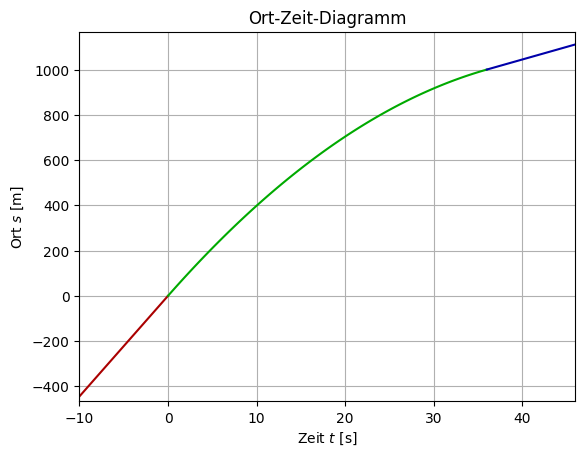

In [12]:
abb_st_1 = plt.figure()
dia_st_1 = abb_st_1.add_subplot(1,1,1)

# Beschriftung
dia_st_1.set_title('Ort-Zeit-Diagramm')
dia_st_1.set_xlabel(r'Zeit $t$ [s]')
dia_st_1.set_ylabel(r'Ort $s$ [m]')

#Achseneinteilung
dia_st_1.set_xlim(t_var_vor_1[0], t_var_nach_1[-1])
dia_st_1.set_ylim(1.05*s_var_vor_1[0], 1.05*s_var_nach_1[-1])
#dia_st_1.minorticks_on()
dia_st_1.grid(which='major')
#dia_st_1.grid(which='minor', color='#e0e0e0')

dia_st_1.plot(t_var_vor_1, s_var_vor_1, color='#aa0000')
dia_st_1.plot(t_var_brems_1, s_var_brems_1, color='#00aa00')
dia_st_1.plot(t_var_nach_1, s_var_nach_1, color='#0000aa')

#abb_st_1.savefig('grafik/zugfahrt_geschw_i_dia-st1.svg')

### Geschwindigkeit-Zeit-Diagramm

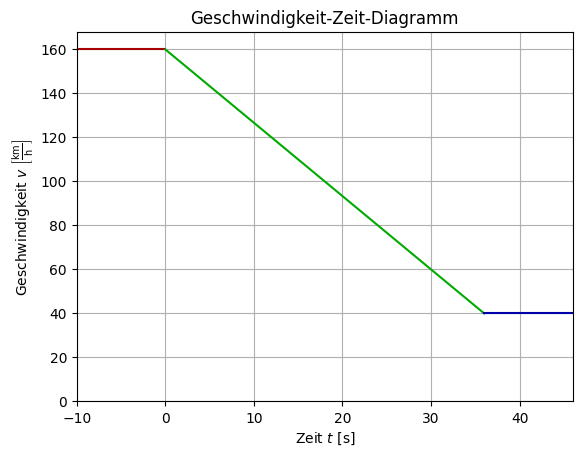

In [14]:
abb_vt_1 = plt.figure()
dia_vt_1 = abb_vt_1.add_subplot(1,1,1)

# Beschriftung
dia_vt_1.set_title('Geschwindigkeit-Zeit-Diagramm')
dia_vt_1.set_xlabel(r'Zeit $t$ [s]')
dia_vt_1.set_ylabel(r'Geschwindigkeit $v$ $\left[\frac{\mathrm{km}}{\mathrm{h}}\right]$')

#Achseneinteilung
dia_vt_1.set_xlim(t_var_vor_1[0], t_var_nach_1[-1])
dia_vt_1.set_ylim(0, 1.05*3.6*v_strecke)
#dia_vt_1.minorticks_on()
dia_vt_1.grid(which='major')
#dia_vt_1.grid(which='minor', color='#e0e0e0')

# Abschnitt 1
dia_vt_1.plot(t_var_vor_1, 3.6*v_var_vor_1, color='#aa0000')
dia_vt_1.plot(t_var_brems_1, 3.6*v_var_brems_1, color='#00aa00')
dia_vt_1.plot(t_var_nach_1, 3.6*v_var_nach_1, color='#0000aa')

#abb_vt_1.savefig('grafik/zugfahrt_geschw_i_dia-vt1.svg')

### Geschwindigkeit-Ort-Diagramm

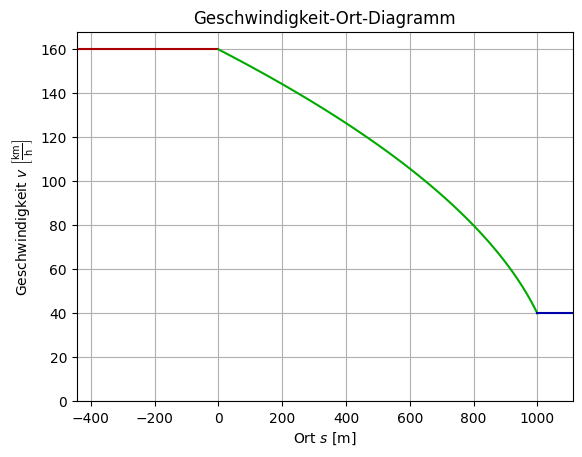

In [15]:
abb_vs_1 = plt.figure()
dia_vs_1 = abb_vs_1.add_subplot(1,1,1)

# Beschriftung
dia_vs_1.set_title('Geschwindigkeit-Ort-Diagramm')
dia_vs_1.set_xlabel(r'Ort $s$ [m]')
dia_vs_1.set_ylabel(r'Geschwindigkeit $v$ $\left[\frac{\mathrm{km}}{\mathrm{h}}\right]$')

#Achseneinteilung
dia_vs_1.set_xlim(s_var_vor_1[0], s_var_nach_1[-1])
dia_vs_1.set_ylim(0, 1.05*3.6*v_strecke)
#dia_vs_1.minorticks_on()
dia_vs_1.grid(which='major')
#dia_vs_1.grid(which='minor', color='#e0e0e0')

dia_vs_1.plot(s_var_vor_1, 3.6*v_var_vor_1, color='#aa0000')
dia_vs_1.plot(s_var_brems_1, 3.6*v_var_brems_1, color='#00aa00')
dia_vs_1.plot(s_var_nach_1, 3.6*v_var_nach_1, color='#0000aa')

#abb_vs_1.savefig('grafik/zugfahrt_geschw_i_dia-vs1.svg')

## Lösung Teilaufgabe 3
Bei den Darstellungen aus Teilaufgabe 2 ist die Beschleunigung nicht stetig, sondern weist zu Beginn und Ende der Bremsphase abrupte Wechsel zwischen Null und Maximalwert auf. Dementsprechend zeigen die Geschwindigkeitsverläufe zu diesen Zeitpunkten einen Knick. Dieser ist sowohl im Geschwindigkeit-Zeit- als auch im Geschwindigkeit-Ort-Diagramm zu erkennen.

Wenn die Beschleunigung kontinuierlich zu- beziehungsweise abnimmt, verschwinden diese Knicke in den Geschwindigkeitsverläufen. Statt dessen entstehen gekrümmte Kurvenverläufe an den Übergängen zwischen gleichförmiger (horizontaler Kurvenverlauf) und gleichmäßig verzögerter Bewegung (linear abfallender Kurvenverlauf). Dies trifft sowohl auf die $v(t)$- als auch auf die $v(s)$-Kurve zu.

Die durchschnittliche Beschleunigung des gesamten Bremsvorgangs ist aufgrund dieser kontinuierlichen Zu- und Abnahme geringer als der Maximalwert während der gleichmäßig verzögerten Phase. Aus diesem Grund muss dieser Maximalwert größer ausfallen als unter Teilaufgabe 1 berechnet, um den vorgegebenen Bremsweg einzuhalten.

## Ergänzung zu Teilaufgabe 3 – Darstellung der Diagramme
Die Aufgabenstellung verlangt nicht ausdrücklich eine Darstellung der Diagramme, sondern fragt lediglich nach deren Aussehen. Insofern ist sie auch mit einer verbalen Beschreibung bereits hinreichend beantwortet, wie dies oben gegeben ist. Zur besseren Verdeutlichung sollen an dieser Stelle nun auch die zugehörigen Diagramme gezeichnet werden.

Zu Beginn und Ende des Bremsvorgangs soll die Beschleunigung mit konstanter Rate („Ruck“) zu- beziehungsweise abnehmen. Der Großteil des Bremsvorgangs soll weiterhin mit konstanter Beschleunigung erfolgen. Damit gliedert sich der Bremsvorgang in drei Abschnitte:

1. Ruckphase zu Beginn der Bremsung: Anwachsen der Verzögerung
2. Gleichmäßig verzögerte Bewegung
3. Ruckphase am Ende der Bremsung: Absenken der Verzögerung auf Null.

Dafür werden der Wert des Rucks (zeitliche Änderung der Beschleunigung) für Zu- und Abnahme der Beschleunigung sowie der Wert der konstanten Beschleunigung für die gleichmäßig verzögerte Bewegung vorgegeben. Letztere muss so gewählt werden, dass der verfügbare Bremsweg eingehalten wird. Für die Darstellung werden außerdem die Zeitpunkte $t_1$ (Übergang vom anfäglichen Ruck in die gleichmäßiger Verzögerung) und $t_2$ (Beginn der abschließenden Ruckphase) mit den zugehörigen Geschwindigkeiten $v_1$ und $v_2$ ermittelt.

In [7]:
a_brems_2 = -1.036 # m/s^2
ruck_zu = -0.3 # m/s^3 Zunahme der Verzögerung
ruck_ab = 0.2 # m/s^3 Abnahme der Verzögerung

### Ruckphase Anfang
Dauer der Ruckphase:

$$t_\mathrm{ruck,zu} = \frac{a_\mathrm{br}}{r_\mathrm{zu}}$$

Da diese Phase zum Zeitpunkt $t=0$ startet, gilt: $t_1 = t_\mathrm{ruck,zu}$.

Verlauf der Geschwindigkeit bei konstantem Ruck $r$:

$$v(t) = \frac{1}{2}r_\mathrm{zu} t^2 + a_0t + v_0 \, .$$

Mit $a_0 = 0$ und $v_0 = v_\mathrm{strecke}$ gilt:

$$v(t) = \frac{1}{2}r_\mathrm{zu} t^2 + v_\mathrm{strecke} \, .$$

Am Ende der Ruckphase ist die Geschwindigkeit von $v_\mathrm{strecke}$ auf $v_1$ abgesunken:

$$v_1 = v(t_\mathrm{ruck,zu}) = v_\mathrm{strecke} + \frac{a_\mathrm{br}^2}{2r_\mathrm{zu}} \, .$$

Verlauf des Orts $s$ bei konstantem Ruck:

$$s(t) = \frac{1}{6}r_\mathrm{zu} t^3 + \frac{1}{2} a_0 t^2 + v_0 t + s_0 \, ,$$

beziehungsweise im konkreten Fall:

$$s(t) = \frac{1}{6}r_\mathrm{zu} t^3 + v_\mathrm{strecke}t \, .$$

### Ruckphase Ende
Dauer der Ruckphase:

$$t_\mathrm{ruck,ab} = -\frac{a_\mathrm{br}}{r_\mathrm{ab}} \, .$$

Verlauf der Beschleunigung:

$$a(t) = r_\mathrm{ab}t + a_\mathrm{br}$$

Verlauf der Geschwindigkeit:

$$v(t) = \frac{1}{2}r_\mathrm{ab}t^2 + a_\mathrm{br}t + v_2 \, .$$

Am Ende der Ruckphase soll die Geschwindigkeit auf $v_\mathrm{bhf}$ abgesunken sein: $v(t_\mathrm{ruck,ab}) = v_\mathrm{bhf}$. Damit lässt sich die Anfangsgeschwindigkeit $v_2$ dieser Bewegungsphase ermitteln:

$$v_2 = v_\mathrm{bhf} + \frac{a_\mathrm{br}^2}{2r_\mathrm{ab}} \, .$$

Verlauf des Orts:

$$s(t) = \frac{1}{6}r_\mathrm{ab}t^3 + \frac{1}{2}a_\mathrm{br}t^2 + v_2t + s_2 \, .$$

### Gleichmäßig verzögerte Bewegung
Dauer dieser Phase:

$$t_\mathrm{gleichm} = \frac{\Delta v}{a_\mathrm{br}} = \frac{v_2 - v_1}{a_\mathrm{br}} = \frac{v_\mathrm{bhf} - v_\mathrm{strecke} + \frac{a_\mathrm{br}^2}{2r_\mathrm{ab}} - \frac{a_\mathrm{br}^2}{2r_\mathrm{zu}}}{a_\mathrm{br}} \, .$$

Für den Zeitpunkt $t_2$ gilt damit:

$$t_2 = t_1 + t_\mathrm{gleichm} \, .$$

Velauf der Geschwindigkeit:

$$v(t) = a_\mathrm{br} t + v_1 \, .$$

Verlauf des Orts:

$$s(t) = \frac{1}{2} a_\mathrm{br} t^2 + v_1 t + s_1 \, .$$

### Berechnung der Diagrammdaten

In [8]:
# Vorlaufzeit
#############
t_var_vor_2 = np.array([-t_vor, 0.0])
v_var_vor_2 = v_strecke * np.ones_like(t_var_vor_2)
s_var_vor_2 = v_strecke * t_var_vor_2

# Ruckphase Anfang
##################
t_ruckzu = a_brems_2 / ruck_zu

t_var_ruckzu_2 = np.linspace(0, t_ruckzu, 100)
v_var_ruckzu_2 = 0.5 * ruck_zu * t_var_ruckzu_2**2 + v_strecke
s_var_ruckzu_2 = 1/6 * ruck_zu * t_var_ruckzu_2**3 + v_strecke * t_var_ruckzu_2

t1 = t_ruckzu
v1 = v_strecke + a_brems_2**2 / (2 * ruck_zu) # Wert  identisch mit v_var_ruckzu_2[-1]

# gleichmäßige Verzögerung
##########################
t_gleichm = (v_bhf - v_strecke + a_brems_2**2 / (2 * ruck_ab) - a_brems_2**2 / (2 * ruck_zu)) / a_brems_2
t2 = t1 + t_gleichm

t_var_gleichm_2 = np.linspace(t1, t2, 100)
v_var_gleichm_2 = a_brems_2 * (t_var_gleichm_2 - t1) + v1
s_var_gleichm_2 = 1/2 * a_brems_2 * (t_var_gleichm_2 - t1)**2 + v1 * (t_var_gleichm_2 - t1) + s_var_ruckzu_2[-1]

v2 = v_bhf + a_brems_2**2 / (2 * ruck_ab)

# Ruckphase Ende
################
t_ruckab = - a_brems_2 / ruck_ab
t3 = t2 + t_ruckab

t_var_ruckab_2 = np.linspace(t2, t3, 100)
v_var_ruckab_2 = 1/2 * ruck_ab * (t_var_ruckab_2 - t2)**2 + a_brems_2 * (t_var_ruckab_2 - t2) + v2
s_var_ruckab_2 = 1/6 * ruck_ab * (t_var_ruckab_2 - t2)**3 + 0.5 * a_brems_2 * (t_var_ruckab_2 - t2)**2 + v2 * (t_var_ruckab_2 - t2) + s_var_gleichm_2[-1]

# Kontrolle Endgeschwindigkeit
print(3.6*v_var_ruckab_2[-1])

# Kontrolle Bremsweg
print(s_var_ruckab_2[-1])

# Nachlaufzeit
##############
t_var_nach_2 = np.array([t_var_ruckab_2[-1], t_var_ruckab_2[-1] + t_nach])
v_var_nach_2 = v_bhf * np.ones_like(t_var_nach_2)
s_var_nach_2 = np.array([s_var_ruckab_2[-1], s_var_ruckab_2[-1] + v_bhf * t_nach])

40.0
999.9128929731158


### Zeichnen der Diagramme
Die Verläufe aus Teilaufgabe 2 sind zum Vergleich jeweils als gepunktete Linie mit in die Diagramme eingetragen.

#### Ort-Zeit-Diagramm

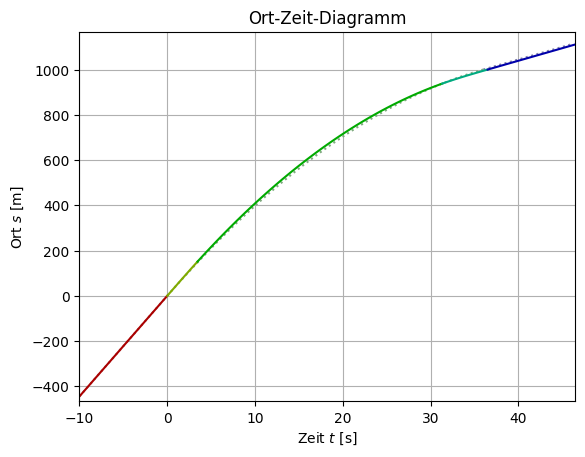

In [16]:
abb_st_2 = plt.figure()
dia_st_2 = abb_st_2.add_subplot(1,1,1)

# Beschriftung
dia_st_2.set_title('Ort-Zeit-Diagramm')
dia_st_2.set_xlabel(r'Zeit $t$ [s]')
dia_st_2.set_ylabel(r'Ort $s$ [m]')

#Achseneinteilung
dia_st_2.set_xlim(t_var_vor_2[0], t_var_nach_2[-1])
dia_st_2.set_ylim(1.05*s_var_vor_2[0], 1.05*s_var_nach_2[-1])
#dia_st_2.minorticks_on()
dia_st_2.grid(which='major')
#dia_st_2.grid(which='minor', color='#e0e0e0')

# Daten des ersten Diagramms zum Vergleich
dia_st_2.plot(t_var_vor_1, s_var_vor_1, color='#aa8080', linestyle=':')
dia_st_2.plot(t_var_brems_1, s_var_brems_1, color='#80aa80', linestyle=':')
dia_st_2.plot(t_var_nach_1, s_var_nach_1, color='#8080aa', linestyle=':')

# Neu berechnete Daten
dia_st_2.plot(t_var_vor_2, s_var_vor_2, color='#aa0000')
dia_st_2.plot(t_var_ruckzu_2, s_var_ruckzu_2, color='#80aa00')
dia_st_2.plot(t_var_gleichm_2, s_var_gleichm_2, color='#00aa00')
dia_st_2.plot(t_var_ruckab_2, s_var_ruckab_2, color='#00aa80')
dia_st_2.plot(t_var_nach_2, s_var_nach_2, color='#0000aa')

#abb_st_2.savefig('grafik/zugfahrt_geschw_i_dia-st2.svg')

#### Geschwindigkeit-Zeit-Diagramm

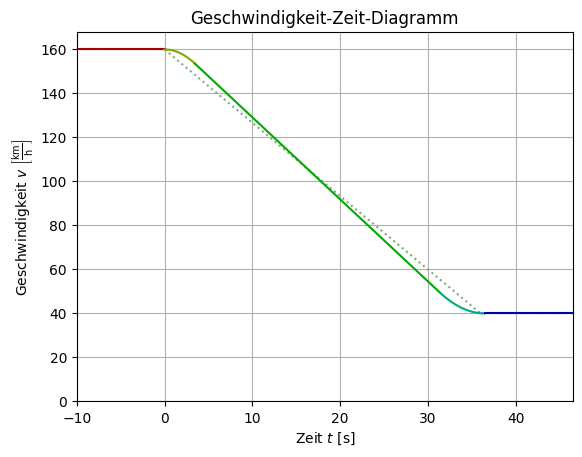

In [17]:
abb_vt_2 = plt.figure()
dia_vt_2 = abb_vt_2.add_subplot(1,1,1)

# Beschriftung
dia_vt_2.set_title('Geschwindigkeit-Zeit-Diagramm')
dia_vt_2.set_xlabel(r'Zeit $t$ [s]')
dia_vt_2.set_ylabel(r'Geschwindigkeit $v$ $\left[\frac{\mathrm{km}}{\mathrm{h}}\right]$')

#Achseneinteilung
dia_vt_2.set_xlim(t_var_vor_2[0], t_var_nach_2[-1])
dia_vt_2.set_ylim(0, 1.05*3.6*v_strecke)
#dia_vt_2.minorticks_on()
dia_vt_2.grid(which='major')
#dia_vt_1.grid(which='minor', color='#e0e0e0')

# Daten des ersten Diagramms zum Vergleich
dia_vt_2.plot(t_var_vor_1, 3.6*v_var_vor_1, color='#aa8080', linestyle=':')
dia_vt_2.plot(t_var_brems_1, 3.6*v_var_brems_1, color='#80aa80', linestyle=':')
dia_vt_2.plot(t_var_nach_1, 3.6*v_var_nach_1, color='#8080aa', linestyle=':')

# Neu berechnete Daten
dia_vt_2.plot(t_var_vor_2, 3.6*v_var_vor_2, color='#aa0000')
dia_vt_2.plot(t_var_ruckzu_2, 3.6*v_var_ruckzu_2, color='#80aa00')
dia_vt_2.plot(t_var_gleichm_2, 3.6*v_var_gleichm_2, color='#00aa00')
dia_vt_2.plot(t_var_ruckab_2, 3.6*v_var_ruckab_2, color='#00aa80')
dia_vt_2.plot(t_var_nach_2, 3.6*v_var_nach_2, color='#0000aa')

#abb_vt_2.savefig('grafik/zugfahrt_geschw_i_dia-vt2.svg')

#### Geschwindigkeit-Ort-Diagramm

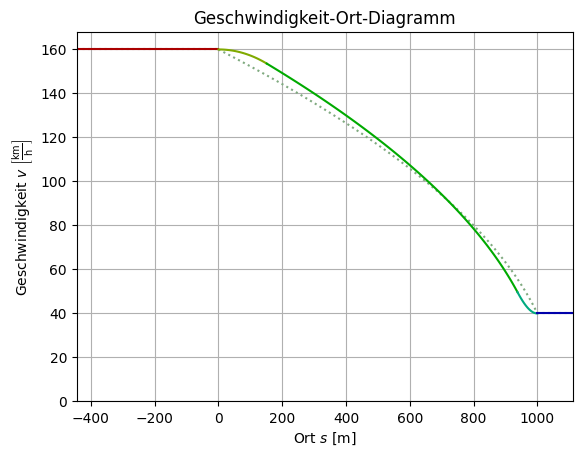

In [18]:
abb_vs_2 = plt.figure()
dia_vs_2 = abb_vs_2.add_subplot(1,1,1)

# Beschriftung
dia_vs_2.set_title('Geschwindigkeit-Ort-Diagramm')
dia_vs_2.set_xlabel(r'Ort $s$ [m]')
dia_vs_2.set_ylabel(r'Geschwindigkeit $v$ $\left[\frac{\mathrm{km}}{\mathrm{h}}\right]$')

#Achseneinteilung
dia_vs_2.set_xlim(s_var_vor_2[0], s_var_nach_2[-1])
dia_vs_2.set_ylim(0, 1.05*3.6*v_strecke)
#dia_vs_2.minorticks_on()
dia_vs_2.grid(which='major')
#dia_vs_2.grid(which='minor', color='#e0e0e0')

# Daten des ersten Diagramms zum Vergleich
dia_vs_2.plot(s_var_vor_1, 3.6*v_var_vor_1, color='#aa8080', linestyle=':')
dia_vs_2.plot(s_var_brems_1, 3.6*v_var_brems_1, color='#80aa80', linestyle=':')
dia_vs_2.plot(s_var_nach_1, 3.6*v_var_nach_1, color='#8080aa', linestyle=':')

# Neu berechnete Daten
dia_vs_2.plot(s_var_vor_2, 3.6*v_var_vor_2, color='#aa0000')
dia_vs_2.plot(s_var_ruckzu_2, 3.6*v_var_ruckzu_2, color='#80aa00')
dia_vs_2.plot(s_var_gleichm_2, 3.6*v_var_gleichm_2, color='#00aa00')
dia_vs_2.plot(s_var_ruckab_2, 3.6*v_var_ruckab_2, color='#00aa80')
dia_vs_2.plot(s_var_nach_2, 3.6*v_var_nach_2, color='#0000aa')

#abb_vs_2.savefig('grafik/zugfahrt_geschw_i_dia-vs2.svg')

### Diskussion der Diagramme
In den Diagrammen zeigt sich das Verhalten, dass bereits zuvor in der Beantwortung der Teilaufgabe 3 beschrieben wurde: Die Knicke in den Geschwindigkeitsverläufen $v(t)$ und $v(s)$ sind verschwunden.

Die Ort-Zeit-Kurve $s(t)$ weist zu Beginn und Ende des Bremsvorgangs ein anderes Krümmungsverhalten auf, da hier eine Zeitabhängigkeit $\propto t^3$ zu Grunde liegt. Der Unterschied ist tatsächlich aber gering, wie die Überlagerung beider Kurven im obigen Diagramm zeigt.

Für die obigen Diagramme wurde die maximale Beschleunigung auf $a = -1{,}036~\frac{\mathrm m}{\mathrm s^2}$ festgelegt, woraus ein Bremsweg von $1000~\mathrm m$ folgt.